In [10]:
# group project 1 
!pip install us 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from us import states
!pip install uszipcode

from uszipcode import SearchEngine
from uszipcode import Zipcode as SimpleZipcode

# Census & gmaps API Keys
import sys
sys.path.append('../')
from config import census_api_key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

c = Census(census_api_key, year=2015)

# Configure gmaps


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
zipcodes_pd = pd.read_csv("../Resources/zipcode.csv")
zipcodes_pd.head()

ZIP        LAT        LNG
0  601  18.180555 -66.749961
1  602  18.361945 -67.175597
2  603  18.455183 -67.119887
3  606  18.158345 -66.932911
4  610  18.295366 -67.125135

In [12]:

#census_pd = pd.DataFrame(census_data)
census_data = c.acs5.get(("B01003_001E", "B23025_005E"), {
                         'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B23025_005E": "Unemployment Count",
                                      "zip code tabulation area": "Zipcode"})

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Unemployment Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()

frames = [census_pd,zipcodes_pd]
census_pd= zipcodes_pd.join(census_pd, lsuffix='_df', rsuffix='_census_pd')


census_pd.head(10)

33120


ZIP        LAT        LNG Zipcode  Population  Unemployment Rate
0  601  18.180555 -66.749961   00601     17982.0          12.306751
1  602  18.361945 -67.175597   00602     40260.0           9.456036
2  603  18.455183 -67.119887   00603     52408.0           7.615250
3  606  18.158345 -66.932911   00606      6331.0           2.827357
4  610  18.295366 -67.125135   00610     28328.0           5.277464
5  612  18.402253 -66.711397   00612     64816.0           6.442854
6  616  18.420412 -66.671979   00616     10707.0           3.175493
7  617  18.445147 -66.559696   00617     24793.0           4.489170
8  622  17.991245 -67.153993   00622      7425.0           2.464646
9  623  18.083361 -67.153897   00623     42955.0           3.433826

In [28]:
pd=census_pd[census_pd['Unemployment Rate'] > 20]
pd


ZIP        LAT         LNG Zipcode  Population  Unemployment Rate
306     1507  42.133935  -71.968025   01525       138.0          22.463768
1003    3894  43.603773  -71.177139   03911       104.0          36.538462
1246    4574  44.260639  -69.391524   04613       141.0          23.404255
1258    4614  44.402775  -68.568701   04629       217.0          40.552995
1411    4962  44.489076  -69.625948   04975       137.0          39.416058
1416    4967  44.769841  -69.433670   04982       450.0          20.666667
1424    4978  44.641819  -69.799890   04992       296.0          21.283784
1656    5832  44.578371  -71.917466   05850       125.0          29.600000
1774    6243  41.844870  -71.805029   06263       107.0          22.429907
1795    6282  41.948870  -72.084820   06350        60.0          23.333333
1806    6350  41.648507  -72.068444   06373       469.0          23.880597
1852    6442  41.341898  -72.433732   06467       110.0          56.363636
2333    8063  39.867297  -75.185621   08074        22.0          36.363636
2352    8084  39.828957  -75.015458   08095       193.0          24.352332
2410    8317  39.400688  -74.829634   08329       105.0          35.238095
2512    8802  40.671028  -75.017983   08821       265.0          21.132075
2793   10969  41.294859  -74.488006   10985        34.0          26.470588
2908   11419  40.688673  -73.822918   11430       186.0          26.344086
3075   11957  41.192201  -72.148968   11970       284.0          23.591549
3259   12416  42.103040  -74.281552   12429       149.0          24.832215
3449   12788  41.787539  -74.589314   12811        67.0          29.850746
3768   13416  43.187371  -74.970659   13436        88.0          27.272727
3866   13662  44.932334  -74.883932   13675       102.0          28.431373
4255   14741  42.219966  -78.611624   14756       184.0          27.173913
4751   15737  40.601258  -78.759013   15752        53.0          32.075472
5254   17027  40.155998  -76.995461   17039        21.0          23.809524
5689   18222  41.035227  -76.003468   18239       228.0          21.929825
5715   18301  41.042703  -75.175581   18331       825.0          20.484848
5895   18913  40.379390  -75.060010   18936        56.0          26.785714
6056   19343  40.100822  -75.754835   19367        39.0          56.410256
...      ...        ...         ...     ...         ...                ...
27959  80473  40.416393 -106.134369   80488        90.0          21.111111
27980  80514  40.065847 -104.955479   80532       133.0          23.308271
28216  81211  38.973327 -106.381258   81231       724.0          21.270718
28453  82833  44.611356 -107.063394   82922        40.0         100.000000
28468  82930  41.016132 -110.644930   82943       140.0          27.142857
28695  83646  43.649557 -116.431756   83666        28.0          21.428571
29025  84732  38.445402 -111.902311   84743        35.0          22.857143
29057  84765  37.125774 -113.675615   84781       150.0          20.666667
29302  85635  31.571011 -110.170235   85654       297.0          38.383838
29365  85933  34.357093 -110.509263   86003         3.0         100.000000
29437  86404  34.590050 -114.307833   86435        59.0          25.423729
29660  87718  36.599808 -105.291885   87735        18.0         100.000000
29698  87933  32.790182 -107.277937   88003       816.0          33.088235
30521  92364  35.340420 -115.426224   92384        33.0          24.242424
30737  93249  35.621706 -119.887939   93262        73.0          21.917808
30818  93514  37.492115 -118.390408   93529       512.0          43.554688
30895  93648  36.620634 -119.520731   93665       759.0          28.853755
31274  95249  38.189115 -120.638708   95305        40.0          60.000000
31458  95571  40.322772 -123.920622   95606        18.0          55.555556
31601  95903  39.106099 -121.368180   95923        10.0          50.000000
31605  95915  40.006256 -121.158894   95930       155.0          21.935484
31627  95944  39.495266 -120.94381

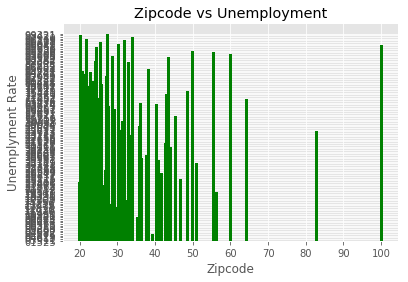

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = pd['Unemployment Rate']
Zip = pd['Zipcode']
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x, Zip, color='green')
plt.xlabel("Zipcode")
plt.ylabel("Unemplyment Rate")
plt.title("Zipcode vs Unemployment")

plt.show()

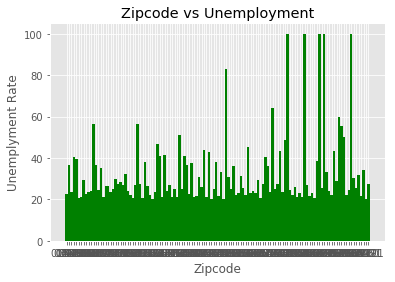

In [46]:
import matplotlib.pyplot as plt

x = pd['Unemployment Rate']
Zip = pd['Zipcode']

plt.bar(Zip, x,1, color='green')
plt.xlabel("Zipcode")
plt.ylabel("Unemplyment Rate")
plt.title("Zipcode vs Unemployment")

plt.show()

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                'radius': [2439.7, 6051.8, 6378.1]},
                 index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))

In [13]:
locations = census_pd[["LAT", "LNG"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
population = census_pd["Population"].astype(float)
unemployment = census_pd["Unemployment Rate"].astype(float)

In [22]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=unemployment, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))